In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [23]:
import numpy as np
import pandas as pd
import sklearn.metrics as skm
# necessary dependencies for plotting
import matplotlib.pyplot as plt #python library for plot and graphs
%matplotlib inline

In [7]:
url = 'https://drive.google.com/file/d/1c0m4v64EGenBaxAWt6fWVD3rrHHqw2k9/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path, header=None)
data.head()
#print(data)

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [8]:
data.columns=(['Size','Bedrooms','Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [13]:
newData = data.copy()
newData.drop('Bedrooms', axis=1, inplace=True)
newData.head()

,Size,Price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [14]:
newData.cov().iloc[1][0]

84959691.73681778

In [16]:
beta_hat=(newData.cov().iloc[1][0]/newData.var().Size)

In [18]:
"""Computing the means"""
x_bar = newData.Size.mean()
y_bar= newData.Price.mean()
print(x_bar,' ' ,y_bar)

2000.6808510638298   340412.6595744681


In [19]:
alpha_hat= y_bar-beta_hat*x_bar

alpha_hat

71270.492448729

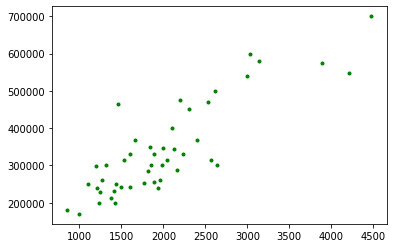

In [28]:
plt.plot(newData.Size, newData.Price, 'g.')

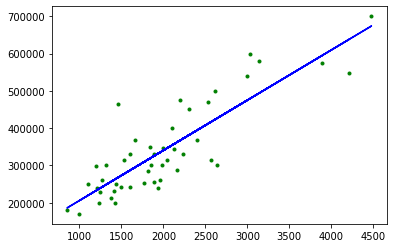

In [30]:
plt.plot(newData.Size, newData.Price, 'g.')
slope=beta_hat
intercept=alpha_hat
line_values = [slope * v + intercept for v in newData.Size]
plt.plot(newData.Size, line_values, 'b-')
plt.show()

**Absolute Error**

Absolute Error is the amount of error in your measurements. It is the 
difference between the measured value and “true” value.
The formula for the absolute error (Δx) is:

(Δx) = xi – x,

Where:
xi is the measurement,
x is the true value.

**Mean Absolute Error**

The Mean Absolute Error(MAE) is the average of all absolute errors. The formula is:

MAE = (1/n)Σi=1to n |xi – x|

Where:

n = the number of errors,

Σ = summation symbol (which means “add them all up”),

|xi – x| = the absolute errors.



**Finding Mean absolute Error**



In [42]:
absolute_error = np.absolute(data.Price - line_values)
total_sum = sum(absolute_error)
mean_absolute_error = total_sum/len(data)
print(mean_absolute_error)

52004.8139986077


**Fitting the line to the data**

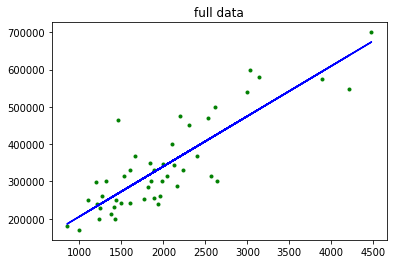

In [44]:
# Plot the best fit line over the actual values
plt.plot(data.Size, data.Price, 'g.')
#plt.show()
plt.plot(data.Size, line_values, 'b')
plt.title("full data")
plt.show()

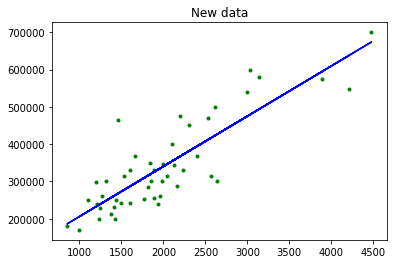

In [47]:
# Plot the best fit line over the actual values
plt.plot(newData.Size, newData.Price, 'g.')
#plt.show()
plt.plot(newData.Size, line_values, 'b')
plt.title("New data")
plt.show()